In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [5]:
ops.reset_default_graph()
with tf.Session() as sess:
    lr = 0.001
    bs = 50
    it = 1000
    
    x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[3, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    model_output = tf.add(tf.matmul(x_data, A), b)
    
    elastic_param1 = tf.constant(1.)
    elastic_param2 = tf.constant(1.)
    l1_a_loss = tf.reduce_mean(tf.abs(A))
    l2_a_loss = tf.reduce_mean(tf.square(A))
    e1_term = tf.multiply(elastic_param1, l1_a_loss)
    e2_term = tf.multiply(elastic_param2, l2_a_loss)
    loss = tf.expand_dims(tf.add(
        tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt = tf.train.GradientDescentOptimizer(lr)
    train_step = my_opt.minimize(loss)
    
    loss_vec = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals), size=bs)
        rand_x = x_vals[rand_index]
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss[0])
        if (i + 1) % 250 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    
    [[sw_coef], [pl_coef], [pw_coef]] = sess.run(A)
    [y_intercept] = sess.run(b)

Step #250 A = [[ 0.39550552]
 [ 1.3751032 ]
 [-0.7850554 ]] b = [[-0.00230194]]
Loss = [3.513591]
Step #500 A = [[ 0.75624377]
 [ 1.043446  ]
 [-0.6550284 ]] b = [[0.15386169]]
Loss = [1.7608149]
Step #750 A = [[ 0.8857899]
 [ 0.8708323]
 [-0.4883598]] b = [[0.26206383]]
Loss = [1.5299518]
Step #1000 A = [[ 0.9258124]
 [ 0.7665181]
 [-0.3275787]] b = [[0.35148543]]
Loss = [1.3913739]


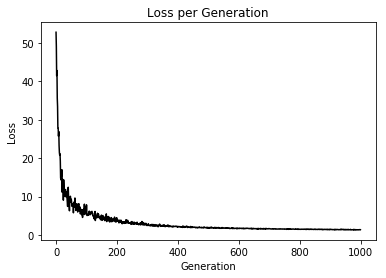

In [6]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()